In [8]:
import pandas as pd
import numpy as np
import joblib
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format='retina'

# Obtain $y$

In [30]:
identifier = 2

In [80]:
def f_00_10(identifier):
    name_list = ['tshirt', 'trouser', 'pullover', 'dress', 'coat',
                 'sandal', 'shirt', 'sneaker', 'bag', 'boot']
    identifier_name = name_list[identifier]

    root = '/net/leksai/nips/result/fmnist'
    recall_rec = pd.read_pickle(Path(root)/'recall_df_{}_90.pkl'.format(0))['Reconstruction Model']
    recall_oc = pd.read_pickle(Path(root)/'recall_df_{}_90.pkl'.format(identifier))['One Class Model']
    ind_to_df_ind = {i: 'A/N = 0.1, Abnormal: {}'.format(i) for i in range(10)}
    ind_list_ = list(recall_oc.index)
    y_un = {k: {} for k in ind_list_}
    y_semi = {k: {} for k in ind_list_}

    for i in ind_list_:
        y_un[i] = [recall_oc.loc[i, 'A/N = 0']] * 9
        y_semi[i] = list(recall_oc[[ind_to_df_ind[i] for i in ind_list_]].loc[i, :])


    div_joint_oc = joblib.load('div_joint_oc.pkl')
    div_margin_oc = joblib.load('div_margin_oc.pkl')

    name_list = ['tshirt', 'trouser', 'pullover', 'dress', 'coat',
                 'sandal', 'shirt', 'sneaker', 'bag', 'boot']

    x_joint = {k: {} for k in ind_list_}
    x_margin = {k: {} for k in ind_list_}

    for i in ind_list_:
        name = name_list[i]
        x_joint[i] = list(div_joint_oc[name].values())
        x_margin[i] = list(div_margin_oc[name].values())

    margin_test_for_identifier = joblib.load('margin_test_for_identifier_oc.pkl')
    i_list = list(np.argsort(margin_test_for_identifier))
    i_list.remove(identifier)

    temp = []
    for i in i_list:
        temp.extend(x_joint[i])
    xlim_left = min(temp) - 2
    xlim_right = max(temp) + 2

    n = len(i_list)
    fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(18, 9))
    plt.subplots_adjust(hspace=0.3)

    for ind, i in enumerate(i_list):
        y0 = np.array(y_un[i])
        y1 = np.array(y_semi[i])
        joint_x = np.array(x_joint[i])
        margin_x = np.array(x_margin[i])

        joint_x = np.sort(joint_x)
        y1 = y1[np.argsort(joint_x)]


        if (margin_test_for_identifier[i]) < 10:
            axes.plot(joint_x, y1, '-o', color=sns.color_palette("Blues_r")[min(5, i)], 
                      markersize=10, alpha=0.8, label=name_list[i])

        axes.set_ylim(0, 1.1)
        axes.set_xlim(xlim_left, xlim_right)
        plt.legend()

        sns.despine()
        axes.set_ylabel('Recall')
        axes.set_xlabel('KL Divergence between Source and Target – KL(P_train || P_test)')
        axes.set_title('[Recall v.s. KL(P_train || P_test)] - Normal: {}.'.format(identifier_name, name_list[i]))

In [81]:
def f_10_20(identifier):
    name_list = ['tshirt', 'trouser', 'pullover', 'dress', 'coat',
                 'sandal', 'shirt', 'sneaker', 'bag', 'boot']
    identifier_name = name_list[identifier]

    root = '/net/leksai/nips/result/fmnist'
    recall_rec = pd.read_pickle(Path(root)/'recall_df_{}_90.pkl'.format(0))['Reconstruction Model']
    recall_oc = pd.read_pickle(Path(root)/'recall_df_{}_90.pkl'.format(identifier))['One Class Model']
    ind_to_df_ind = {i: 'A/N = 0.1, Abnormal: {}'.format(i) for i in range(10)}
    ind_list_ = list(recall_oc.index)
    y_un = {k: {} for k in ind_list_}
    y_semi = {k: {} for k in ind_list_}

    for i in ind_list_:
        y_un[i] = [recall_oc.loc[i, 'A/N = 0']] * 9
        y_semi[i] = list(recall_oc[[ind_to_df_ind[i] for i in ind_list_]].loc[i, :])


    div_joint_oc = joblib.load('div_joint_oc.pkl')
    div_margin_oc = joblib.load('div_margin_oc.pkl')

    name_list = ['tshirt', 'trouser', 'pullover', 'dress', 'coat',
                 'sandal', 'shirt', 'sneaker', 'bag', 'boot']

    x_joint = {k: {} for k in ind_list_}
    x_margin = {k: {} for k in ind_list_}

    for i in ind_list_:
        name = name_list[i]
        x_joint[i] = list(div_joint_oc[name].values())
        x_margin[i] = list(div_margin_oc[name].values())

    margin_test_for_identifier = joblib.load('margin_test_for_identifier_oc.pkl')
    i_list = list(np.argsort(margin_test_for_identifier))
    i_list.remove(identifier)

    temp = []
    for i in i_list:
        temp.extend(x_joint[i])
    xlim_left = min(temp) - 2
    xlim_right = max(temp) + 2

    n = len(i_list)
    fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(18, 9))
    plt.subplots_adjust(hspace=0.3)

    for ind, i in enumerate(i_list):
        y0 = np.array(y_un[i])
        y1 = np.array(y_semi[i])
        joint_x = np.array(x_joint[i])
        margin_x = np.array(x_margin[i])

        joint_x = np.sort(joint_x)
        y1 = y1[np.argsort(joint_x)]


        if ((margin_test_for_identifier[i]) > 10) & ((margin_test_for_identifier[i]) <= 20):
            axes.plot(joint_x, y1, '-o', color=sns.color_palette("Greens_r")[min(5, i)], 
                      markersize=10, alpha=0.8, label=name_list[i])

        axes.set_ylim(0, 1.1)
        axes.set_xlim(xlim_left, xlim_right)
        plt.legend()

        sns.despine()
        axes.set_ylabel('Recall')
        axes.set_xlabel('KL Divergence between Source and Target – KL(P_train || P_test)')
        axes.set_title('[Recall v.s. KL(P_train || P_test)] - Normal: {}.'.format(identifier_name, name_list[i]))

In [82]:
def f_20_30(identifier):
    name_list = ['tshirt', 'trouser', 'pullover', 'dress', 'coat',
                 'sandal', 'shirt', 'sneaker', 'bag', 'boot']
    identifier_name = name_list[identifier]

    root = '/net/leksai/nips/result/fmnist'
    recall_rec = pd.read_pickle(Path(root)/'recall_df_{}_90.pkl'.format(0))['Reconstruction Model']
    recall_oc = pd.read_pickle(Path(root)/'recall_df_{}_90.pkl'.format(identifier))['One Class Model']
    ind_to_df_ind = {i: 'A/N = 0.1, Abnormal: {}'.format(i) for i in range(10)}
    ind_list_ = list(recall_oc.index)
    y_un = {k: {} for k in ind_list_}
    y_semi = {k: {} for k in ind_list_}

    for i in ind_list_:
        y_un[i] = [recall_oc.loc[i, 'A/N = 0']] * 9
        y_semi[i] = list(recall_oc[[ind_to_df_ind[i] for i in ind_list_]].loc[i, :])


    div_joint_oc = joblib.load('div_joint_oc.pkl')
    div_margin_oc = joblib.load('div_margin_oc.pkl')

    name_list = ['tshirt', 'trouser', 'pullover', 'dress', 'coat',
                 'sandal', 'shirt', 'sneaker', 'bag', 'boot']

    x_joint = {k: {} for k in ind_list_}
    x_margin = {k: {} for k in ind_list_}

    for i in ind_list_:
        name = name_list[i]
        x_joint[i] = list(div_joint_oc[name].values())
        x_margin[i] = list(div_margin_oc[name].values())

    margin_test_for_identifier = joblib.load('margin_test_for_identifier_oc.pkl')
    i_list = list(np.argsort(margin_test_for_identifier))
    i_list.remove(identifier)

    temp = []
    for i in i_list:
        temp.extend(x_joint[i])
    xlim_left = min(temp) - 2
    xlim_right = max(temp) + 2

    n = len(i_list)
    fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(18, 9))
    plt.subplots_adjust(hspace=0.3)

    for ind, i in enumerate(i_list):
        y0 = np.array(y_un[i])
        y1 = np.array(y_semi[i])
        joint_x = np.array(x_joint[i])
        margin_x = np.array(x_margin[i])

        joint_x = np.sort(joint_x)
        y1 = y1[np.argsort(joint_x)]



        if ((margin_test_for_identifier[i]) > 20) & ((margin_test_for_identifier[i]) <= 30):
            axes.plot(joint_x, y1, '-o', color=sns.color_palette("Reds_r")[min(5, i)], 
                      markersize=10, alpha=0.8, label=name_list[i])

        axes.set_ylim(0, 1.1)
        axes.set_xlim(xlim_left, xlim_right)
        plt.legend()

        sns.despine()
        axes.set_ylabel('Recall')
        axes.set_xlabel('KL Divergence between Source and Target – KL(P_train || P_test)')
        axes.set_title('[Recall v.s. KL(P_train || P_test)] - Normal: {}.'.format(identifier_name, name_list[i]))

In [83]:
def f_30_40(identifier):
    name_list = ['tshirt', 'trouser', 'pullover', 'dress', 'coat',
                 'sandal', 'shirt', 'sneaker', 'bag', 'boot']
    identifier_name = name_list[identifier]

    root = '/net/leksai/nips/result/fmnist'
    recall_rec = pd.read_pickle(Path(root)/'recall_df_{}_90.pkl'.format(0))['Reconstruction Model']
    recall_oc = pd.read_pickle(Path(root)/'recall_df_{}_90.pkl'.format(identifier))['One Class Model']
    ind_to_df_ind = {i: 'A/N = 0.1, Abnormal: {}'.format(i) for i in range(10)}
    ind_list_ = list(recall_oc.index)
    y_un = {k: {} for k in ind_list_}
    y_semi = {k: {} for k in ind_list_}

    for i in ind_list_:
        y_un[i] = [recall_oc.loc[i, 'A/N = 0']] * 9
        y_semi[i] = list(recall_oc[[ind_to_df_ind[i] for i in ind_list_]].loc[i, :])


    div_joint_oc = joblib.load('div_joint_oc.pkl')
    div_margin_oc = joblib.load('div_margin_oc.pkl')

    name_list = ['tshirt', 'trouser', 'pullover', 'dress', 'coat',
                 'sandal', 'shirt', 'sneaker', 'bag', 'boot']

    x_joint = {k: {} for k in ind_list_}
    x_margin = {k: {} for k in ind_list_}

    for i in ind_list_:
        name = name_list[i]
        x_joint[i] = list(div_joint_oc[name].values())
        x_margin[i] = list(div_margin_oc[name].values())

    margin_test_for_identifier = joblib.load('margin_test_for_identifier_oc.pkl')
    i_list = list(np.argsort(margin_test_for_identifier))
    i_list.remove(identifier)

    temp = []
    for i in i_list:
        temp.extend(x_joint[i])
    xlim_left = min(temp) - 2
    xlim_right = max(temp) + 2

    n = len(i_list)
    fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(18, 9))
    plt.subplots_adjust(hspace=0.3)

    for ind, i in enumerate(i_list):
        y0 = np.array(y_un[i])
        y1 = np.array(y_semi[i])
        joint_x = np.array(x_joint[i])
        margin_x = np.array(x_margin[i])

        joint_x = np.sort(joint_x)
        y1 = y1[np.argsort(joint_x)]

        if ((margin_test_for_identifier[i]) > 30) & ((margin_test_for_identifier[i]) <= 40):
            axes.plot(joint_x, y1, '-o', color=sns.color_palette("Oranges_r")[min(5, i)], 
                      markersize=10, alpha=0.8, label=name_list[i])

        axes.set_ylim(0, 1.1)
        axes.set_xlim(xlim_left, xlim_right)
        plt.legend()

        sns.despine()
        axes.set_ylabel('Recall')
        axes.set_xlabel('KL Divergence between Source and Target – KL(P_train || P_test)')
        axes.set_title('[Recall v.s. KL(P_train || P_test)] - Normal: {}.'.format(identifier_name, name_list[i]))

In [84]:
def f_40_50(identifier):
    name_list = ['tshirt', 'trouser', 'pullover', 'dress', 'coat',
                 'sandal', 'shirt', 'sneaker', 'bag', 'boot']
    identifier_name = name_list[identifier]

    root = '/net/leksai/nips/result/fmnist'
    recall_rec = pd.read_pickle(Path(root)/'recall_df_{}_90.pkl'.format(0))['Reconstruction Model']
    recall_oc = pd.read_pickle(Path(root)/'recall_df_{}_90.pkl'.format(identifier))['One Class Model']
    ind_to_df_ind = {i: 'A/N = 0.1, Abnormal: {}'.format(i) for i in range(10)}
    ind_list_ = list(recall_oc.index)
    y_un = {k: {} for k in ind_list_}
    y_semi = {k: {} for k in ind_list_}

    for i in ind_list_:
        y_un[i] = [recall_oc.loc[i, 'A/N = 0']] * 9
        y_semi[i] = list(recall_oc[[ind_to_df_ind[i] for i in ind_list_]].loc[i, :])


    div_joint_oc = joblib.load('div_joint_oc.pkl')
    div_margin_oc = joblib.load('div_margin_oc.pkl')

    name_list = ['tshirt', 'trouser', 'pullover', 'dress', 'coat',
                 'sandal', 'shirt', 'sneaker', 'bag', 'boot']

    x_joint = {k: {} for k in ind_list_}
    x_margin = {k: {} for k in ind_list_}

    for i in ind_list_:
        name = name_list[i]
        x_joint[i] = list(div_joint_oc[name].values())
        x_margin[i] = list(div_margin_oc[name].values())

    margin_test_for_identifier = joblib.load('margin_test_for_identifier_oc.pkl')
    i_list = list(np.argsort(margin_test_for_identifier))
    i_list.remove(identifier)

    temp = []
    for i in i_list:
        temp.extend(x_joint[i])
    xlim_left = min(temp) - 2
    xlim_right = max(temp) + 2

    n = len(i_list)
    fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(18, 9))
    plt.subplots_adjust(hspace=0.3)

    for ind, i in enumerate(i_list):
        y0 = np.array(y_un[i])
        y1 = np.array(y_semi[i])
        joint_x = np.array(x_joint[i])
        margin_x = np.array(x_margin[i])

        joint_x = np.sort(joint_x)
        y1 = y1[np.argsort(joint_x)]

        if ((margin_test_for_identifier[i]) > 40) & ((margin_test_for_identifier[i]) <= 50):
            axes.plot(joint_x, y1, '-o', color=sns.color_palette("Grays_r")[min(5, i)], 
                      markersize=10, alpha=0.8, label=name_list[i])

            axes.set_ylim(0, 1.1)
            axes.set_xlim(xlim_left, xlim_right)
            plt.legend()

            sns.despine()
            axes.set_ylabel('Recall')
            axes.set_xlabel('KL Divergence between Source and Target – KL(P_train || P_test)')
            axes.set_title('[Recall v.s. KL(P_train || P_test)] - Normal: {}.'.format(identifier_name, name_list[i]))

In [94]:
def f_50_00(identifier):
    name_list = ['tshirt', 'trouser', 'pullover', 'dress', 'coat',
                 'sandal', 'shirt', 'sneaker', 'bag', 'boot']
    identifier_name = name_list[identifier]

    root = '/net/leksai/nips/result/fmnist'
    recall_rec = pd.read_pickle(Path(root)/'recall_df_{}_90.pkl'.format(0))['Reconstruction Model']
    recall_oc = pd.read_pickle(Path(root)/'recall_df_{}_90.pkl'.format(identifier))['One Class Model']
    ind_to_df_ind = {i: 'A/N = 0.1, Abnormal: {}'.format(i) for i in range(10)}
    ind_list_ = list(recall_oc.index)
    y_un = {k: {} for k in ind_list_}
    y_semi = {k: {} for k in ind_list_}

    for i in ind_list_:
        y_un[i] = [recall_oc.loc[i, 'A/N = 0']] * 9
        y_semi[i] = list(recall_oc[[ind_to_df_ind[i] for i in ind_list_]].loc[i, :])


    div_joint_oc = joblib.load('div_joint_oc.pkl')
    div_margin_oc = joblib.load('div_margin_oc.pkl')

    name_list = ['tshirt', 'trouser', 'pullover', 'dress', 'coat',
                 'sandal', 'shirt', 'sneaker', 'bag', 'boot']

    x_joint = {k: {} for k in ind_list_}
    x_margin = {k: {} for k in ind_list_}

    for i in ind_list_:
        name = name_list[i]
        x_joint[i] = list(div_joint_oc[name].values())
        x_margin[i] = list(div_margin_oc[name].values())

    margin_test_for_identifier = joblib.load('margin_test_for_identifier_oc.pkl')
    i_list = list(np.argsort(margin_test_for_identifier))
    i_list.remove(identifier)

    temp = []
    for i in i_list:
        temp.extend(x_joint[i])
    xlim_left = min(temp) - 2
    xlim_right = max(temp) + 2

    n = len(i_list)
    fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(18, 9))
    plt.subplots_adjust(hspace=0.3)

    for ind, i in enumerate(i_list):
        y0 = np.array(y_un[i])
        y1 = np.array(y_semi[i])
        joint_x = np.array(x_joint[i])
        margin_x = np.array(x_margin[i])

        joint_x = np.sort(joint_x)
        y1 = y1[np.argsort(joint_x)]

        if ((margin_test_for_identifier[i]) > 50):
            axes.plot(joint_x, y1, '-o', color=sns.color_palette("magma")[min(5, i)], 
                      markersize=10, alpha=0.8, label=name_list[i])


            axes.set_ylim(0, 1.1)
            axes.set_xlim(xlim_left, xlim_right)
            plt.legend()

            sns.despine()
            axes.set_ylabel('Recall')
            axes.set_xlabel('KL Divergence between Source and Target – KL(P_train || P_test)')
            axes.set_title('[Recall v.s. KL(P_train || P_test)] - Normal: {}.'.format(identifier_name, name_list[i]))

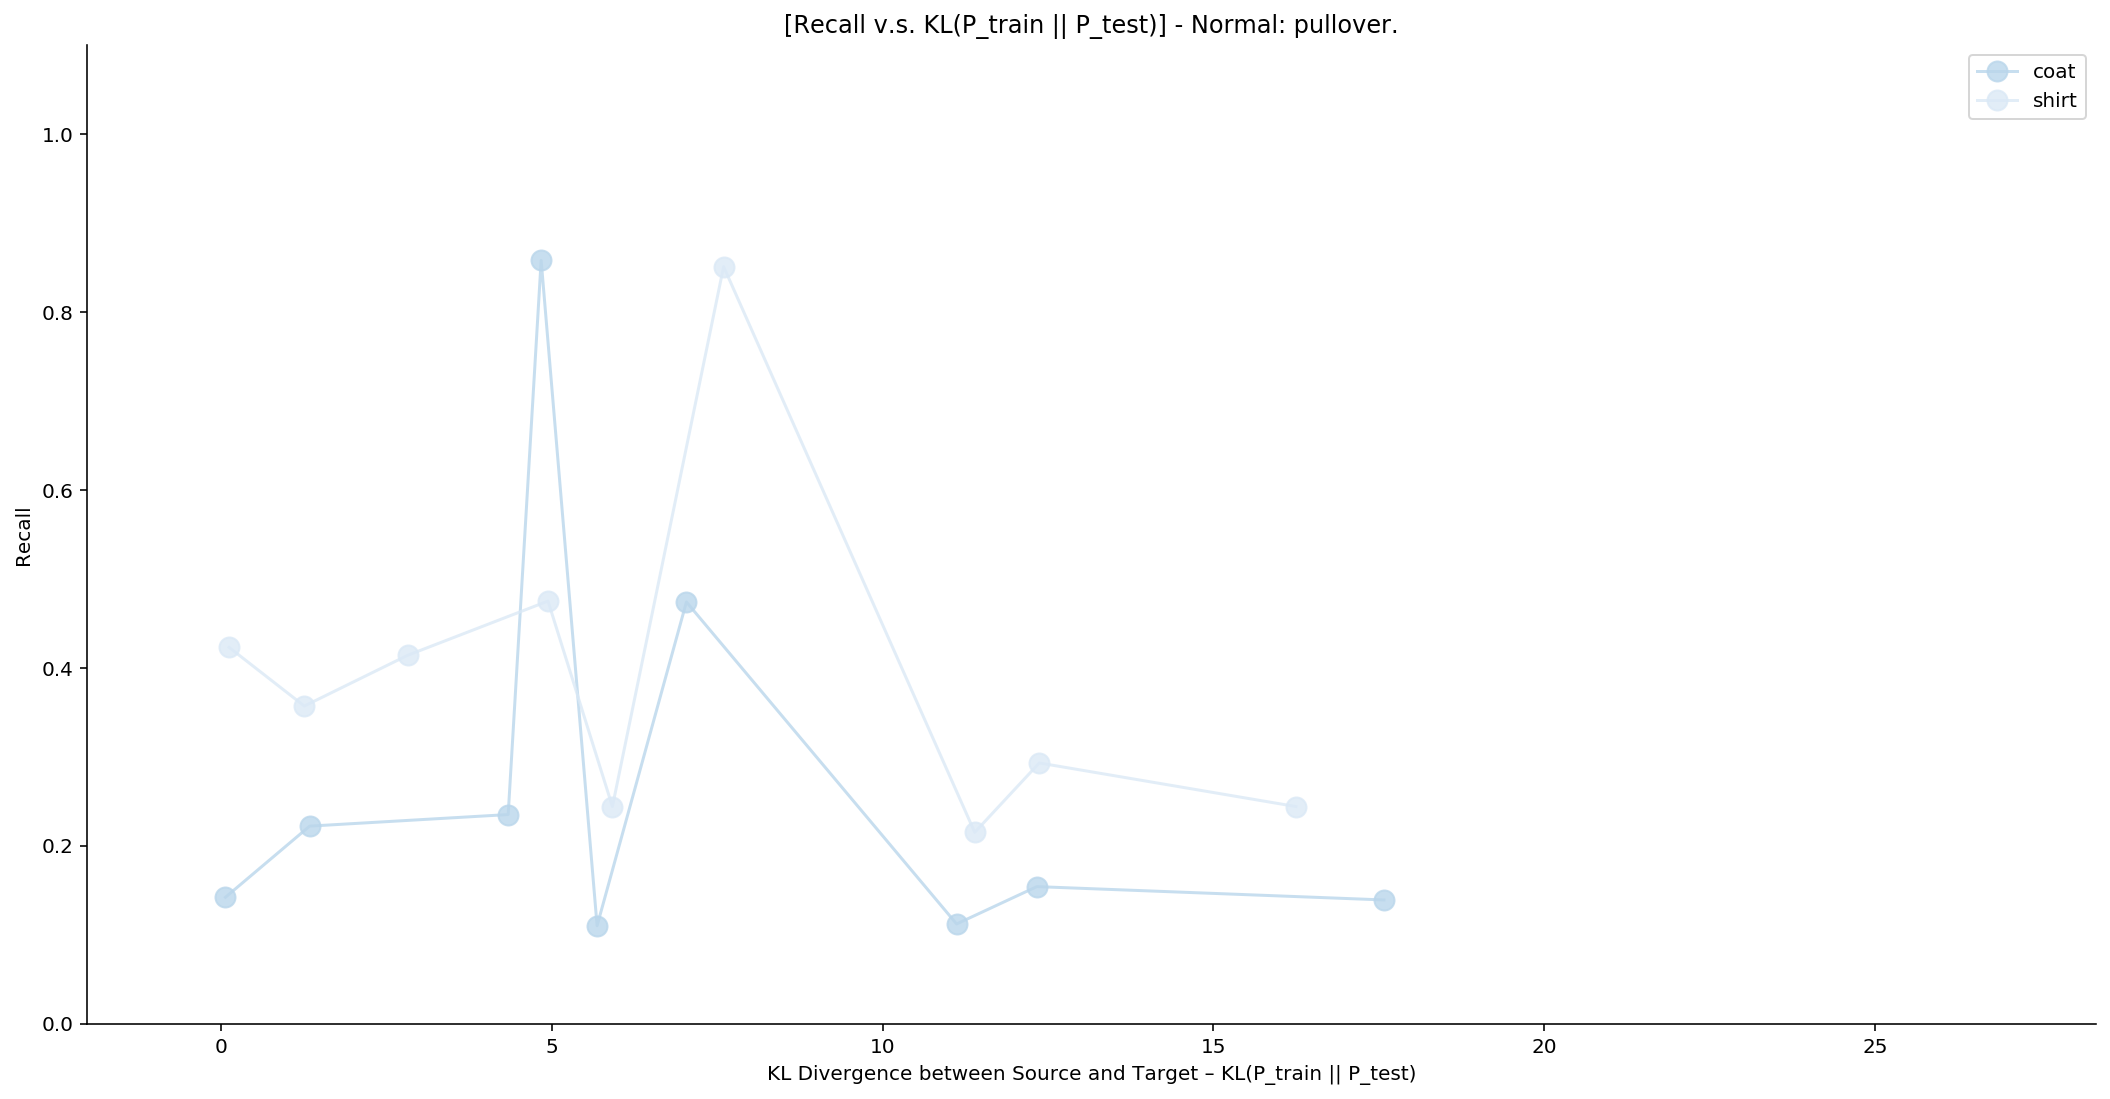

In [87]:
f_00_10(2)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


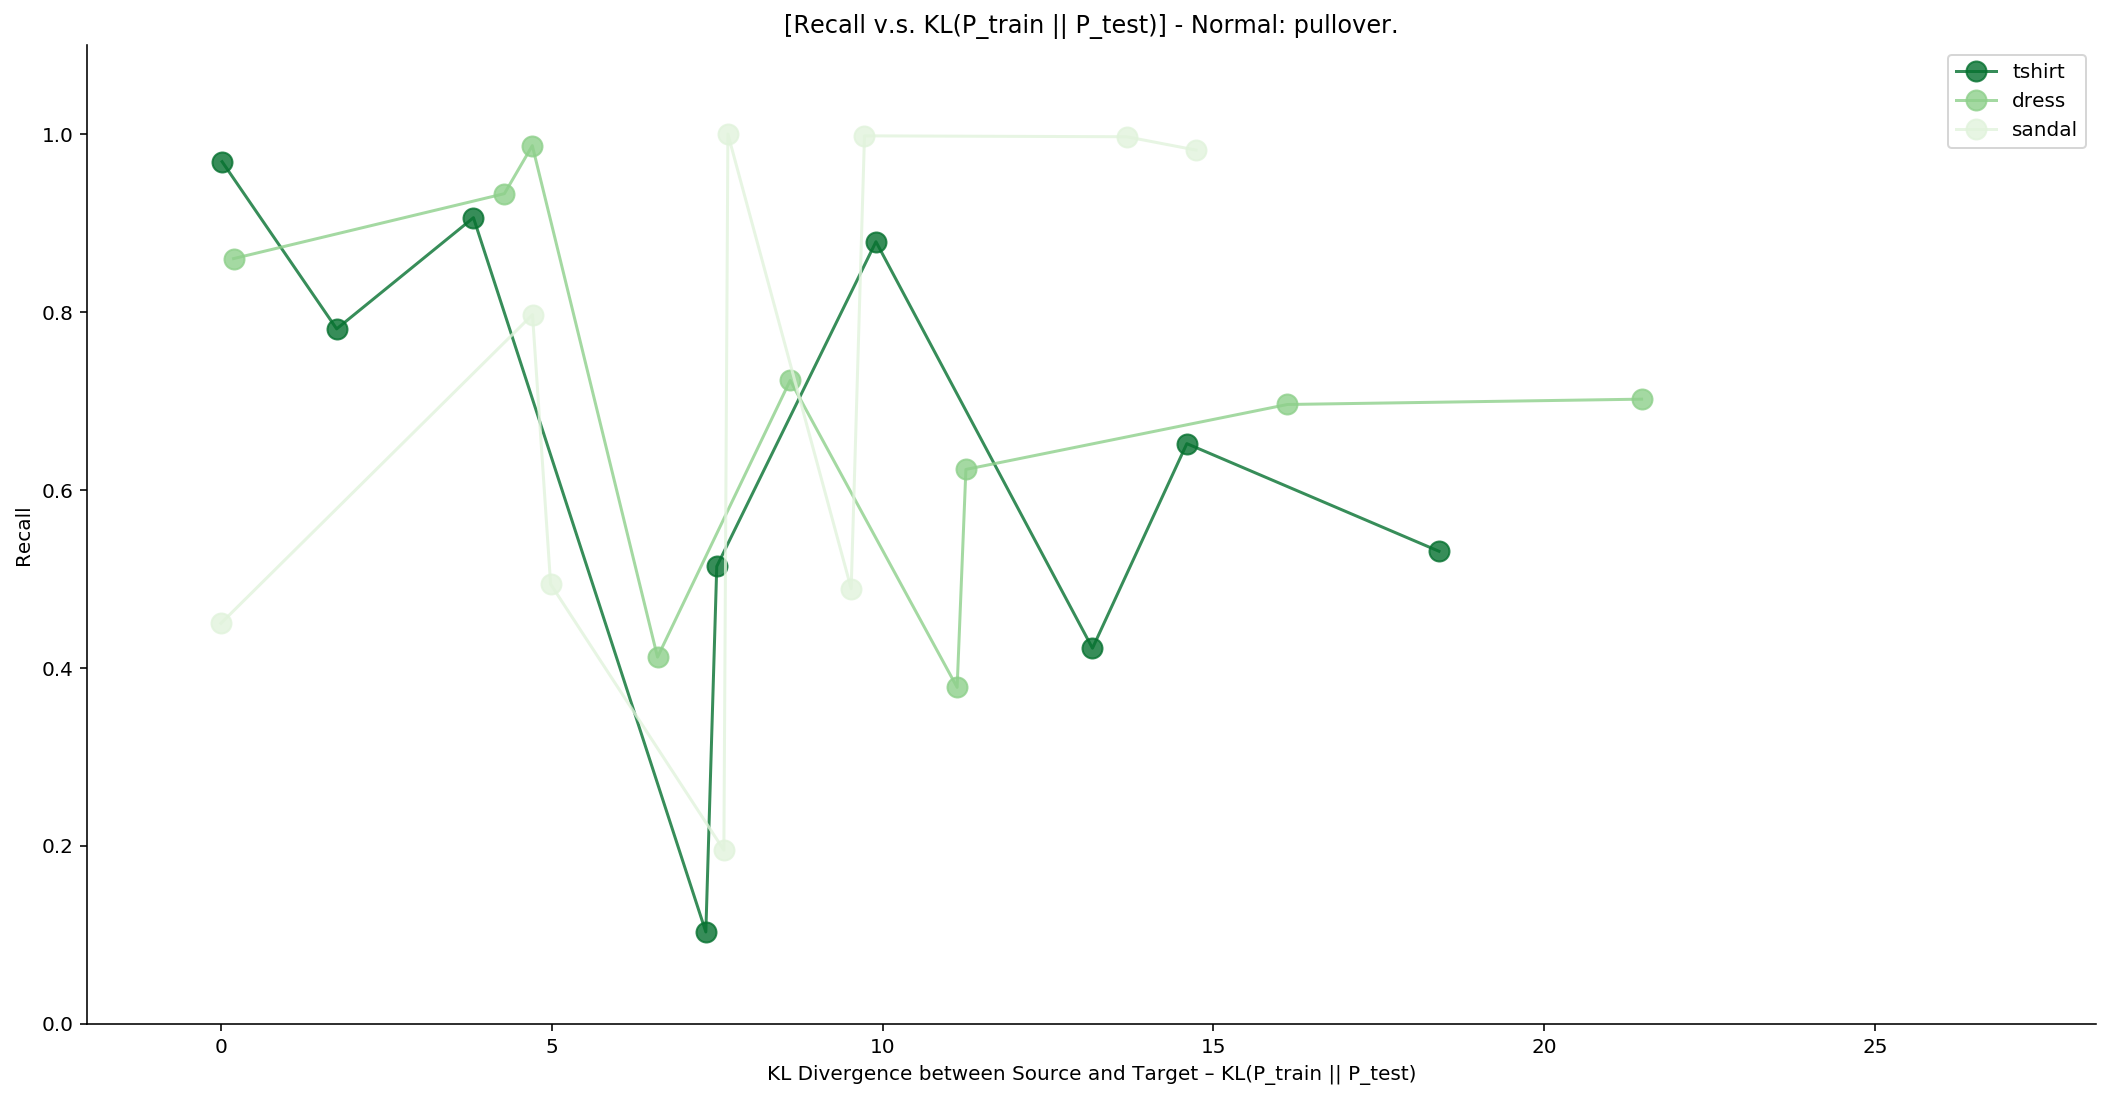

In [89]:
f_10_20(2)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


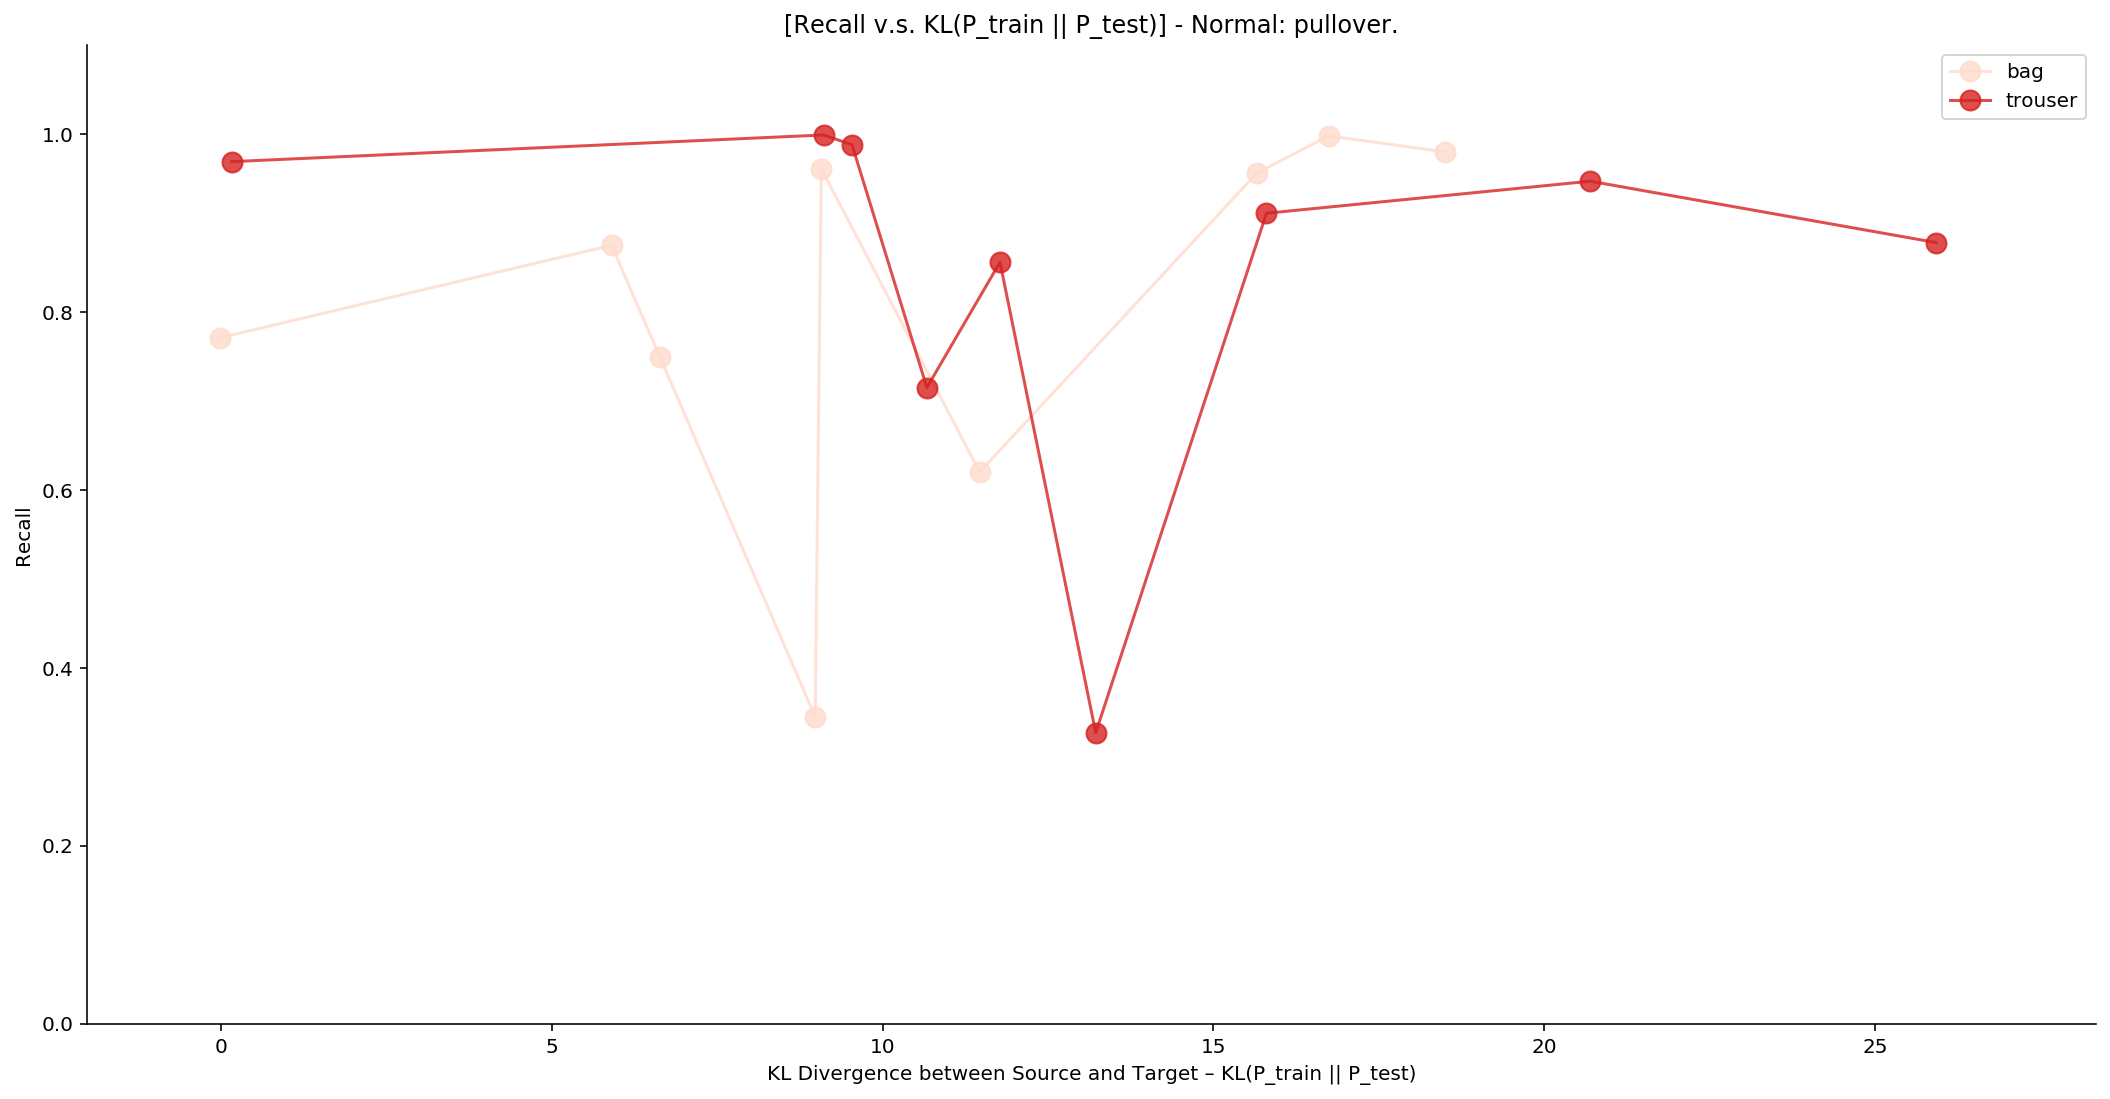

In [93]:
f_20_30(2)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


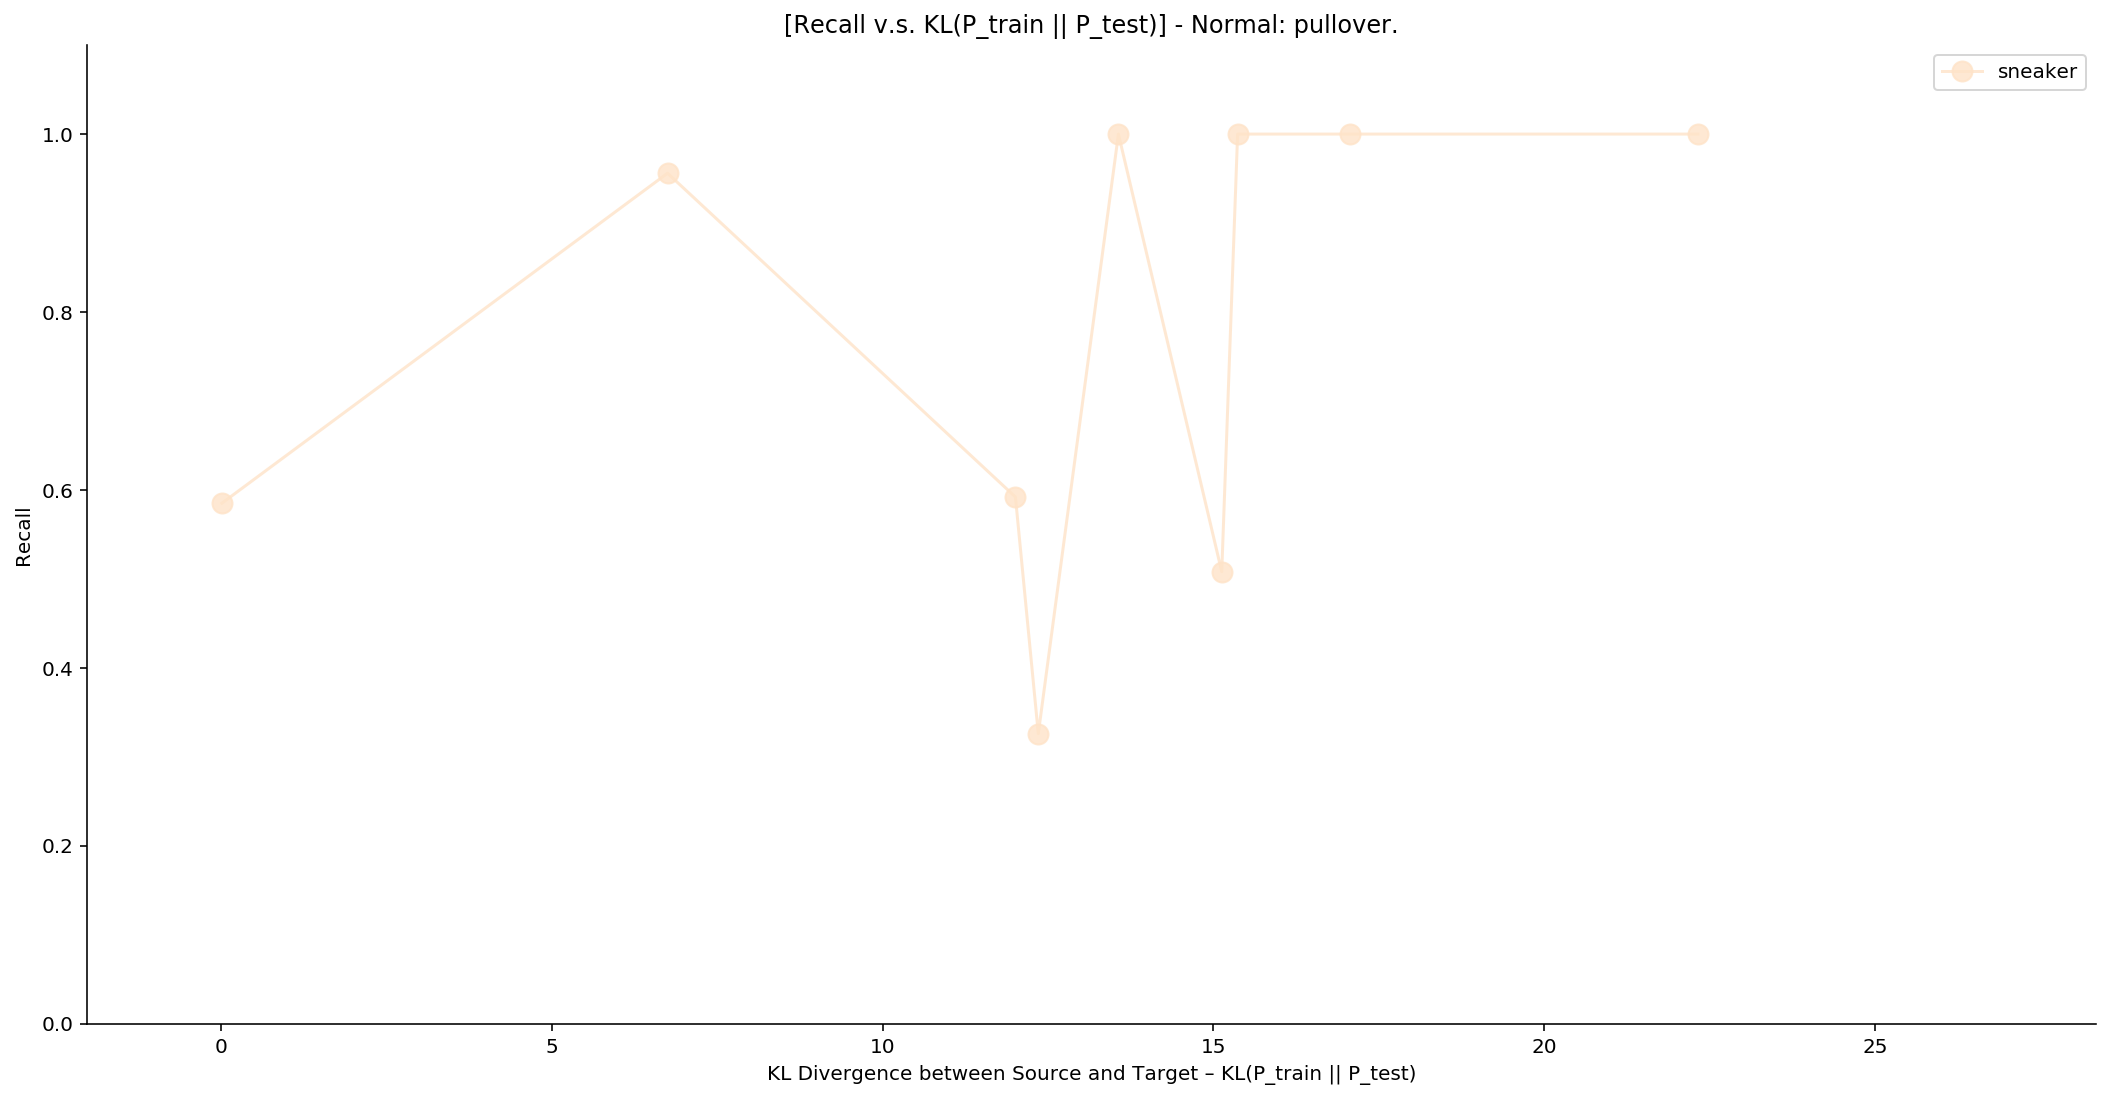

In [90]:
f_30_40(2)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


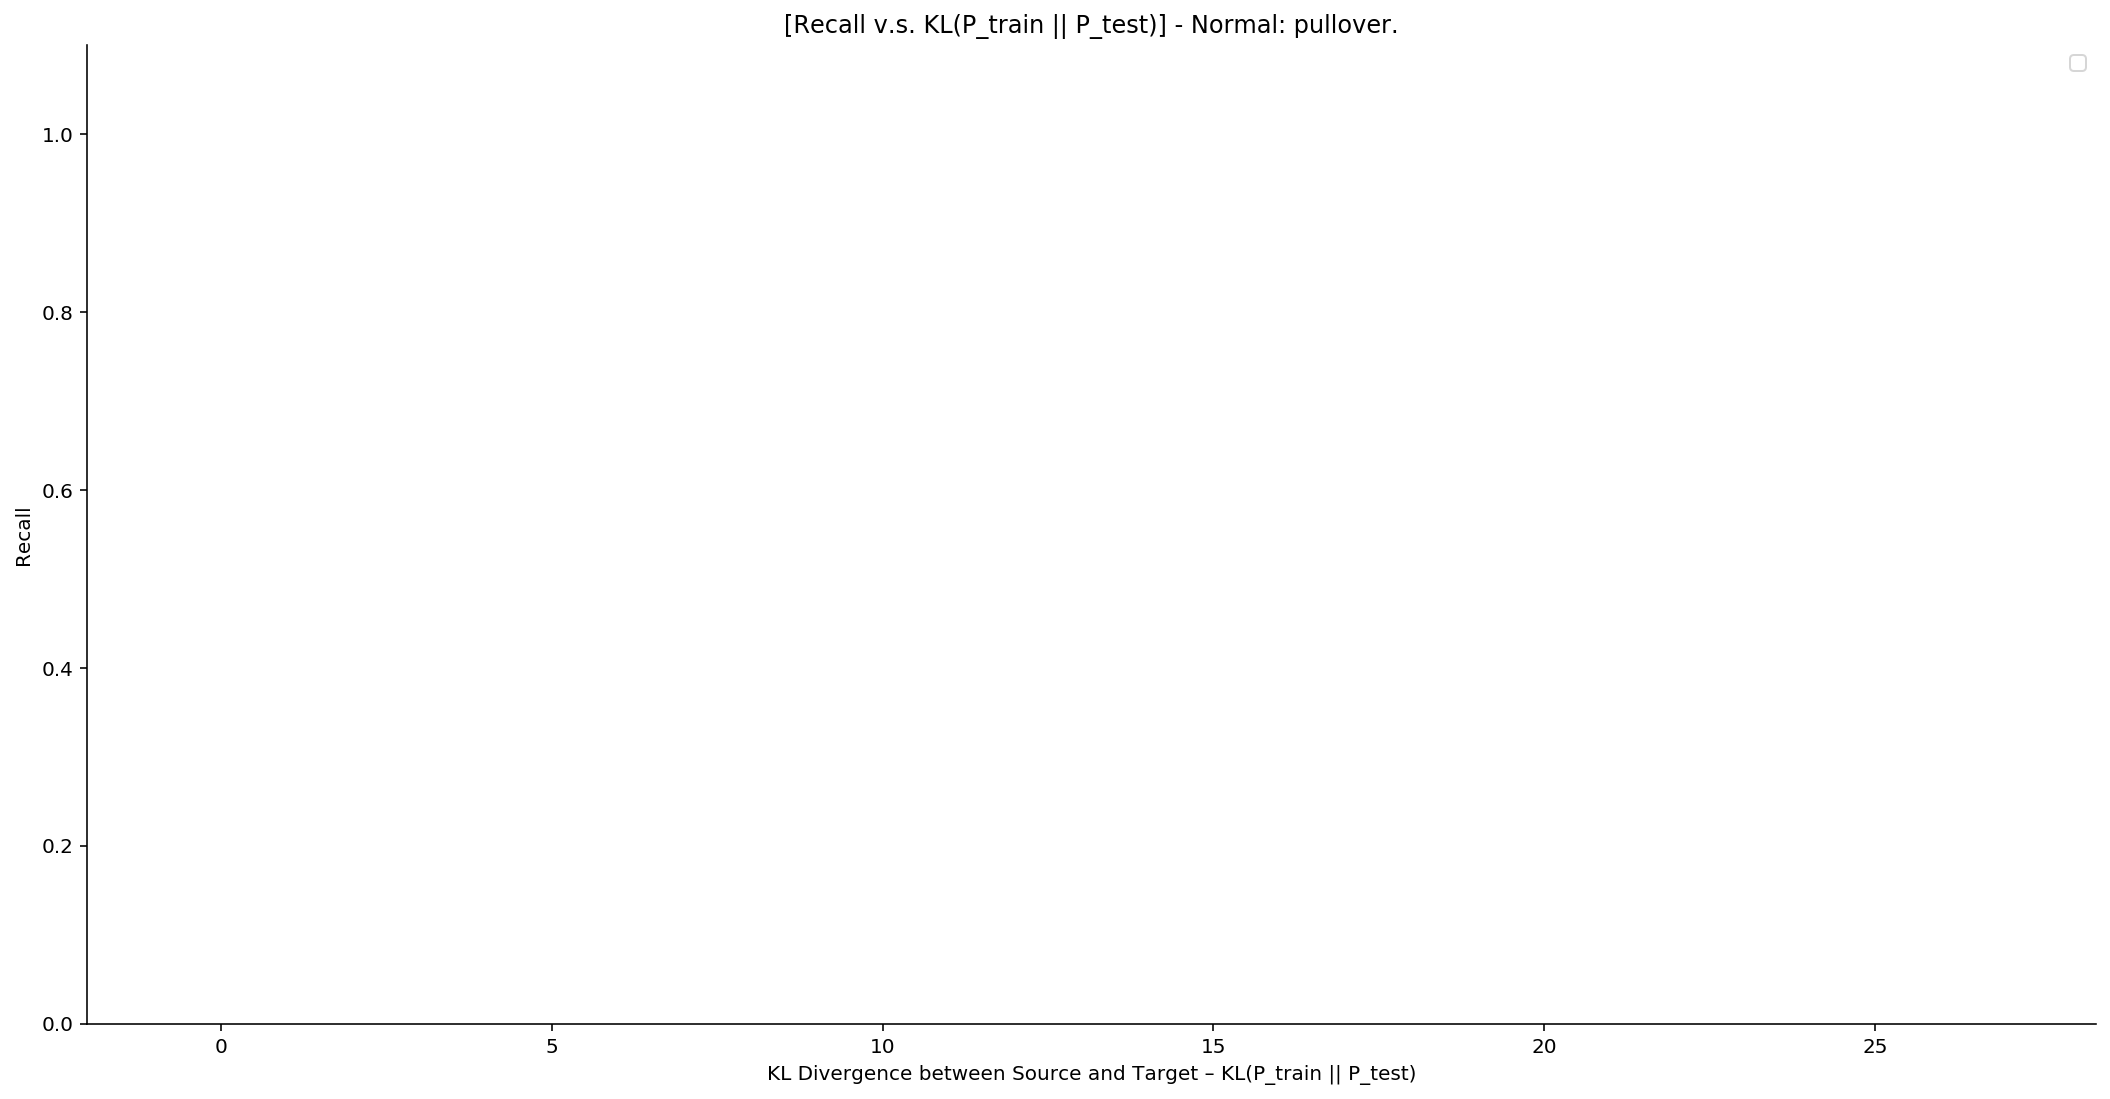

In [91]:
f_40_50(2)

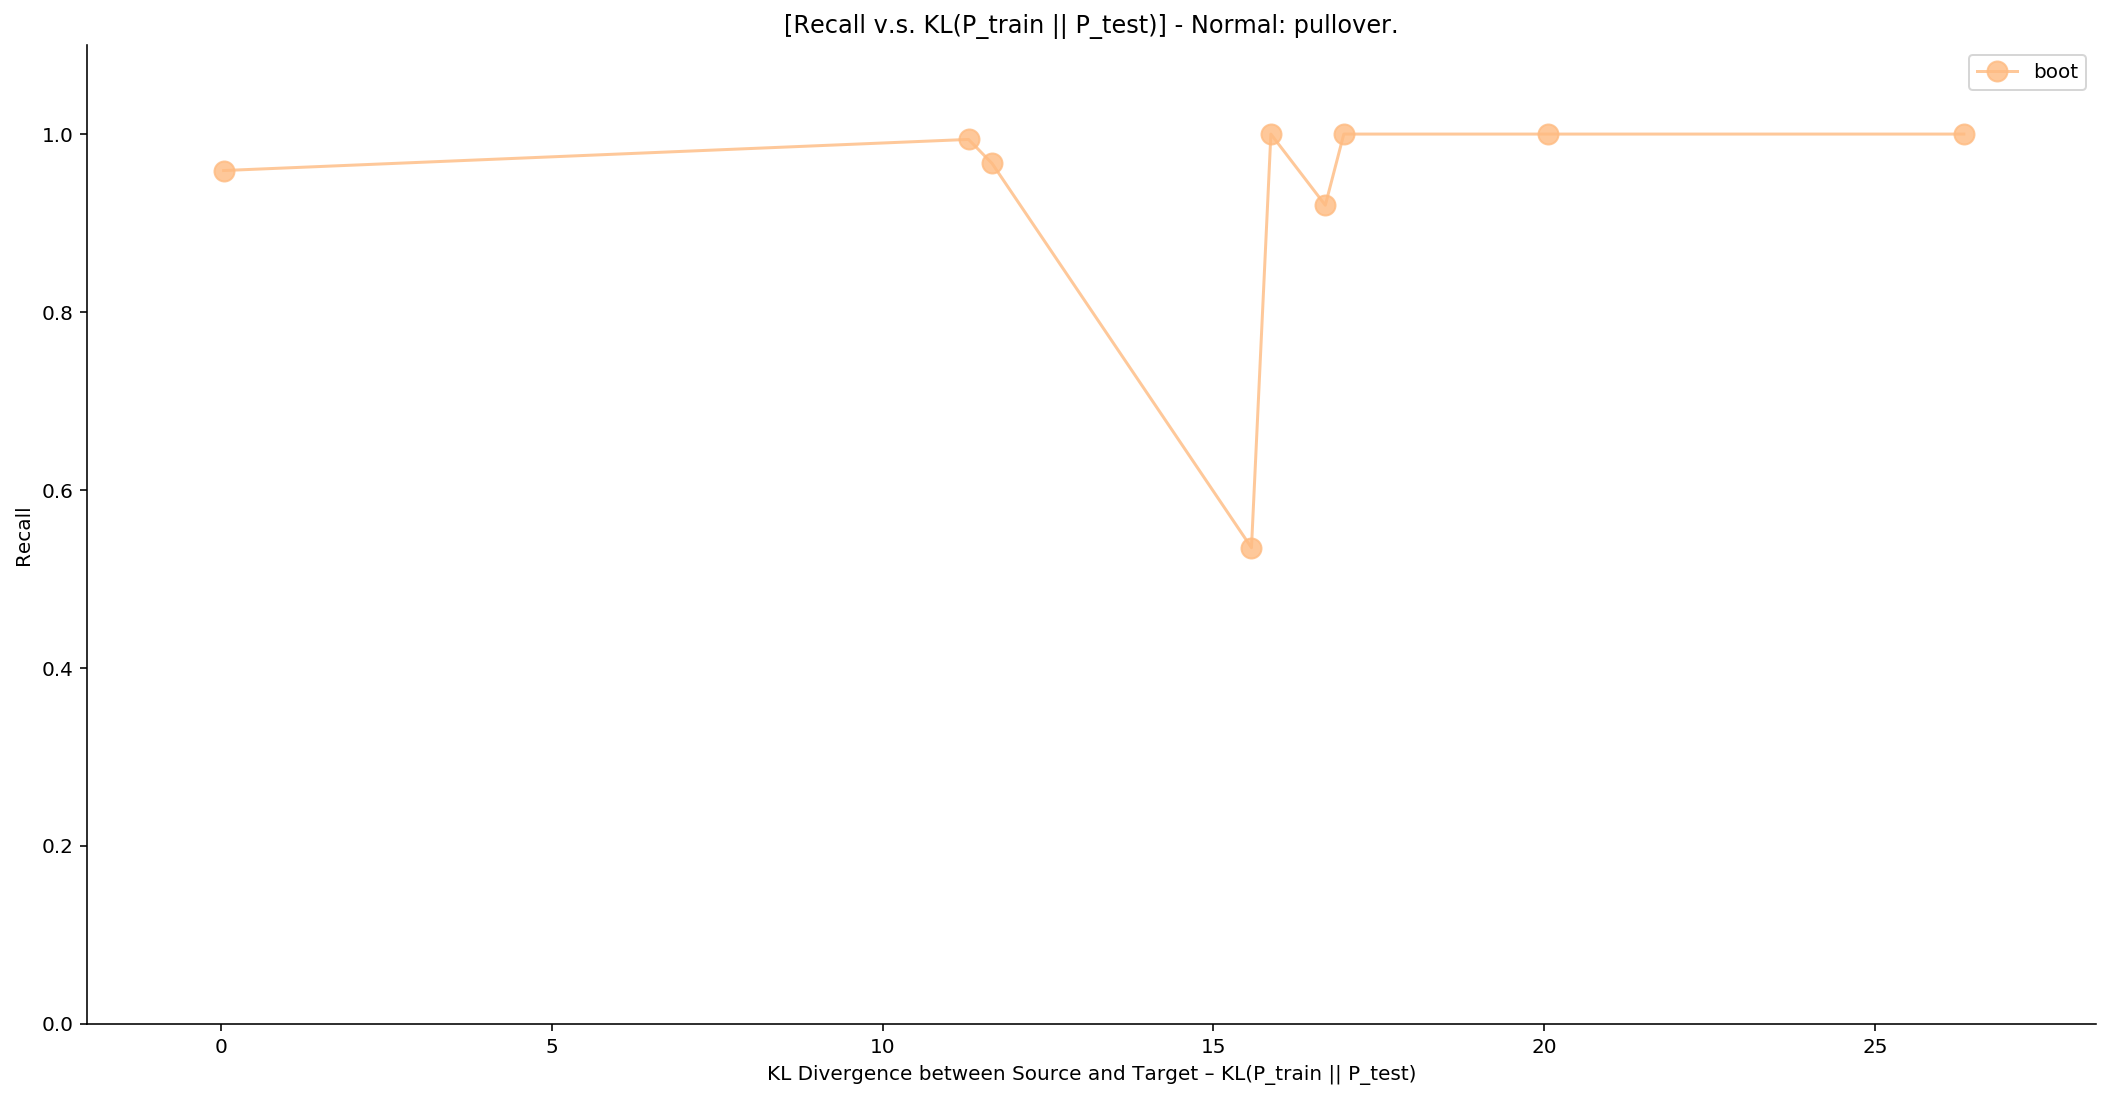

In [95]:
f_50_00(2)

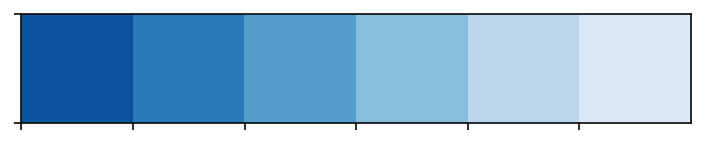

In [97]:
sns.palplot(sns.color_palette("Blues_r"))

# Obtain $x$

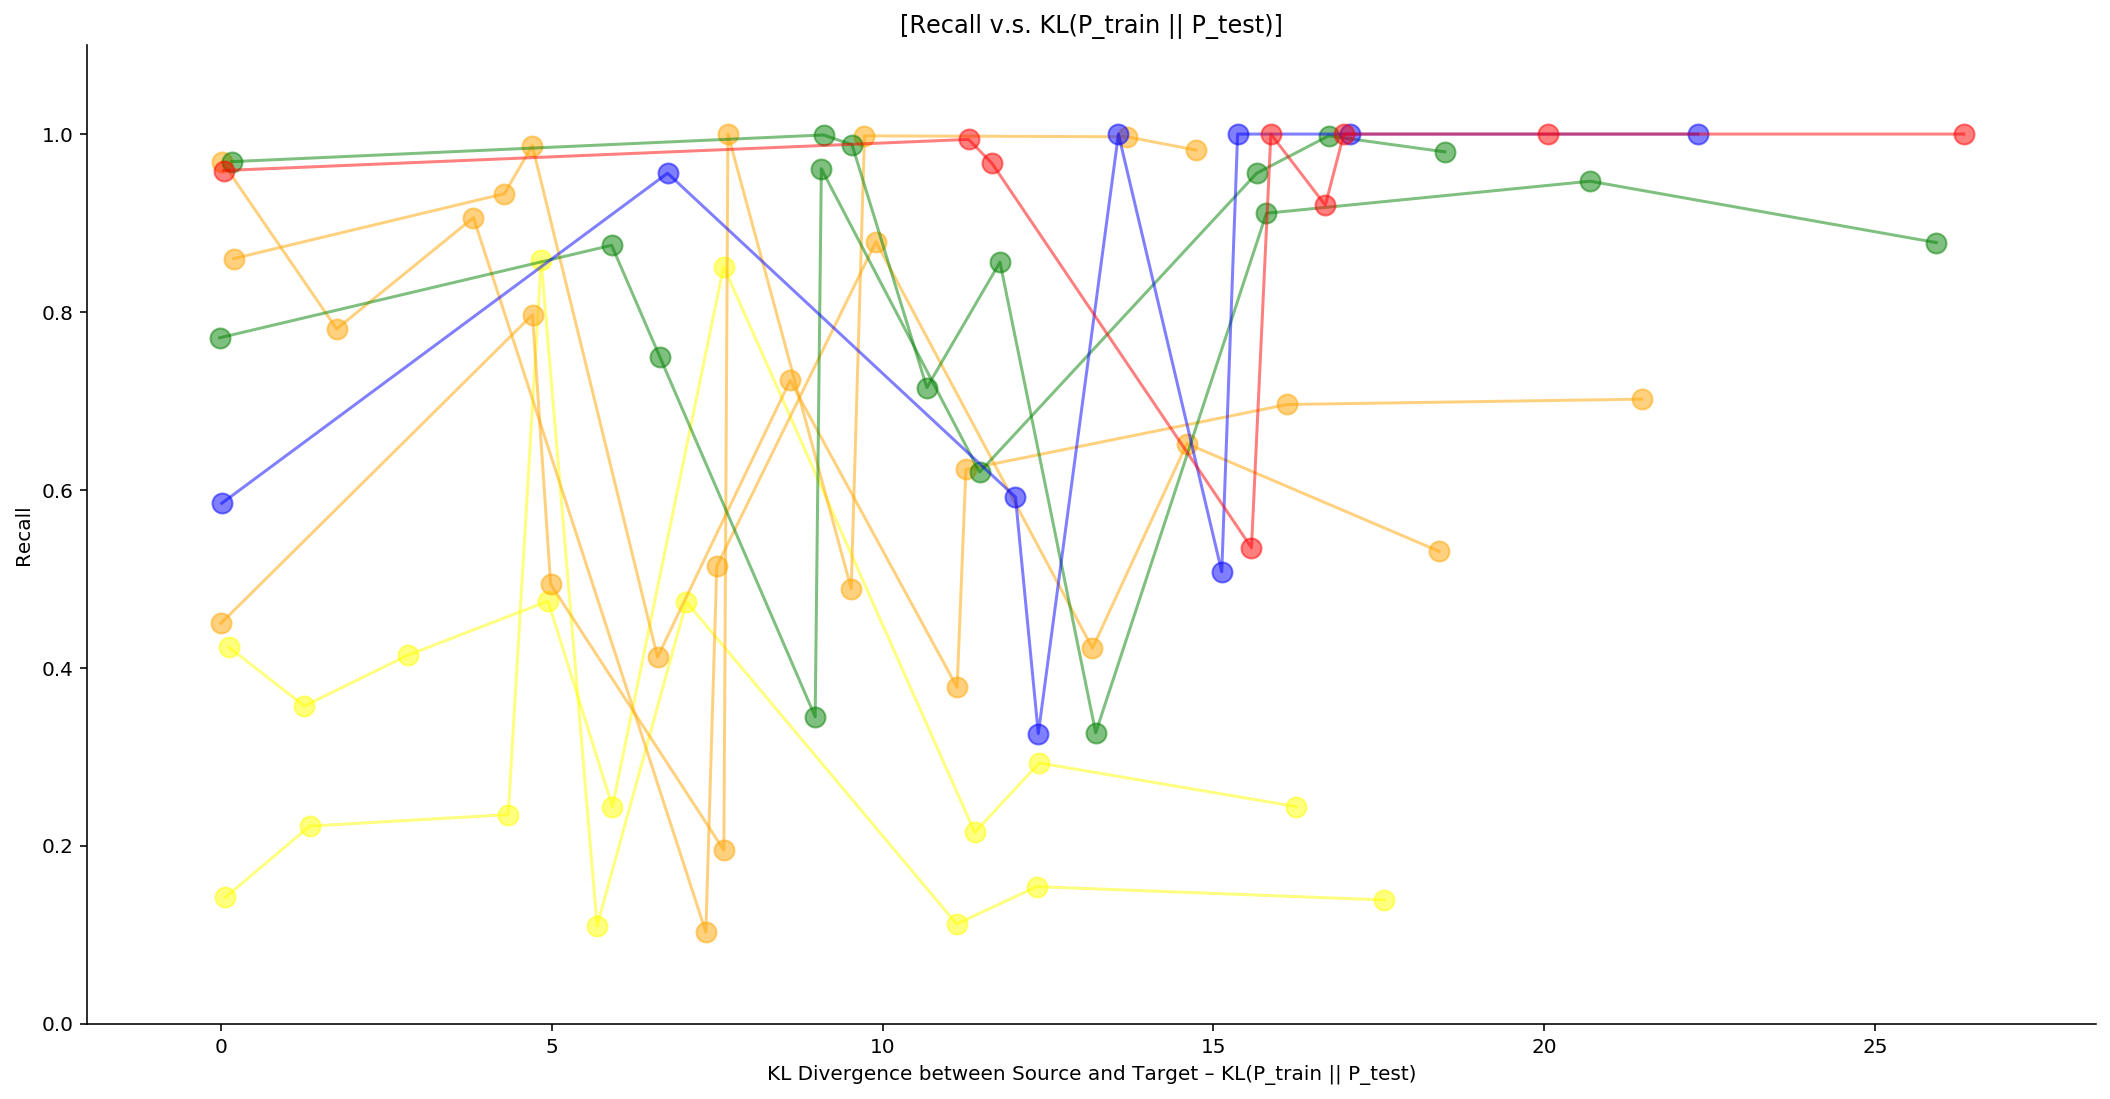

In [9]:
margin_test_for_identifier = joblib.load('margin_test_for_identifier_oc.pkl')
i_list = list(np.argsort(margin_test_for_identifier))
i_list.remove(identifier)

temp = []
for i in i_list:
    temp.extend(x_joint[i])
xlim_left = min(temp) - 2
xlim_right = max(temp) + 2

n = len(i_list)
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(18, 9))
plt.subplots_adjust(hspace=0.3)

for ind, i in enumerate(i_list):
    y0 = np.array(y_un[i])
    y1 = np.array(y_semi[i])
    joint_x = np.array(x_joint[i])
    margin_x = np.array(x_margin[i])
    
    joint_x = np.sort(joint_x)
    y1 = y1[np.argsort(joint_x)]
    
    
    if (margin_test_for_identifier[i]) < 10:
        axes.plot(joint_x, y1, '-o', color='yellow', markersize=10, alpha=0.5)
        
    elif ((margin_test_for_identifier[i]) > 10) & ((margin_test_for_identifier[i]) <= 20):
        axes.plot(joint_x, y1, '-o', color='orange', markersize=10, alpha=0.5)
        
    elif ((margin_test_for_identifier[i]) > 20) & ((margin_test_for_identifier[i]) <= 30):
        axes.plot(joint_x, y1, '-o', color='green', markersize=10, alpha=0.5) 
        
    elif ((margin_test_for_identifier[i]) > 30) & ((margin_test_for_identifier[i]) <= 40):
        axes.plot(joint_x, y1, '-o', color='blue', markersize=10, alpha=0.5)
        
    elif ((margin_test_for_identifier[i]) > 40) & ((margin_test_for_identifier[i]) <= 50):
        axes.plot(joint_x, y1, '-o', color='purple', markersize=10, alpha=0.5) 
        
    elif ((margin_test_for_identifier[i]) > 50):
        axes.plot(joint_x, y1, '-o', color='red', markersize=10, alpha=0.5)
        

    axes.set_ylim(0, 1.1)
    axes.set_xlim(xlim_left, xlim_right)

    sns.despine()
    axes.set_ylabel('Recall')
    axes.set_xlabel('KL Divergence between Source and Target – KL(P_train || P_test)')
    axes.set_title('[Recall v.s. KL(P_train || P_test)]')

# Draw Plots for Joint Divergence

In [8]:
margin_test_for_identifier = joblib.load('margin_test_for_identifier_oc.pkl')
i_list = list(np.argsort(margin_test_for_identifier))
i_list.remove(identifier)

In [9]:
temp = []
for i in i_list:
    temp.extend(x_joint[i])
xlim_left = min(temp) - 2
xlim_right = max(temp) + 2

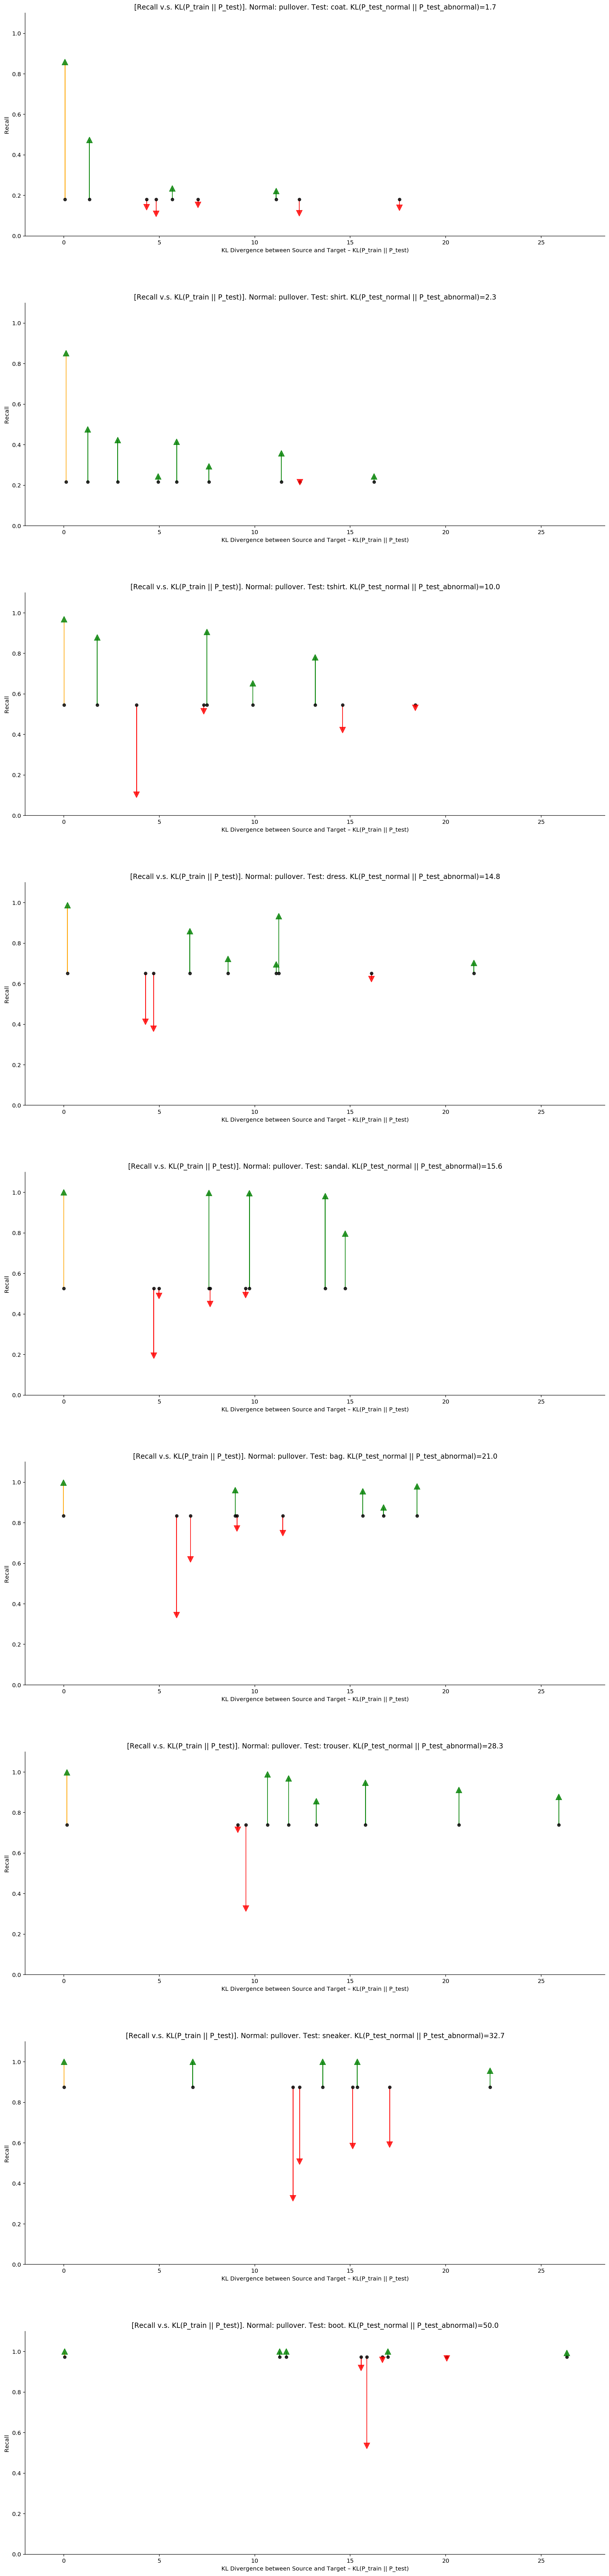

In [10]:
n = len(i_list)
fig, axes = plt.subplots(ncols=1, nrows=n, figsize=(18, 9 * n))
plt.subplots_adjust(hspace=0.3)

for ind, i in enumerate(i_list):
    y0 = np.array(y_un[i])
    y1 = np.array(y_semi[i])
    joint_x = np.array(x_joint[i])
    margin_x = np.array(x_margin[i])

    dy = y1 - y0
    pos_ind = np.where(dy >= 0)[0]
    nega_ind = np.where(dy < 0)[0]

    axes[ind].plot(joint_x[pos_ind], y0[pos_ind], '.', color='black', markersize=10, alpha=0.8)
    axes[ind].plot(joint_x[nega_ind], y0[nega_ind], '.', color='black', markersize=10, alpha=0.8)
    axes[ind].plot(joint_x[pos_ind], y1[pos_ind], '^', color='green', markersize=10, alpha=0.8)
    axes[ind].plot(joint_x[nega_ind], y1[nega_ind], 'v', color='red', markersize=10, alpha=0.8)
    
    for j in range(len(y0)):
        if j == ind_list_.index(i):
            axes[ind].arrow(joint_x[j], y0[j], 0, y1[j] - y0[j],
                  width=0.001, length_includes_head=True, head_length=0.01, color='orange')  
        elif y0[j] - y1[j] >= 0:
            axes[ind].arrow(joint_x[j], y0[j], 0, y1[j] - y0[j],
                  width=0.001, length_includes_head=True, head_length=0.01, color='red')
        else:
            axes[ind].arrow(joint_x[j], y0[j], 0, y1[j]-y0[j],
                  width=0.001, length_includes_head=True, head_length=0.01, color='green')

    axes[ind].set_ylim(0, 1.1)
    axes[ind].set_xlim(xlim_left, xlim_right)

    sns.despine()
    axes[ind].set_ylabel('Recall')
    axes[ind].set_xlabel('KL Divergence between Source and Target – KL(P_train || P_test)')
    axes[ind].set_title('[Recall v.s. KL(P_train || P_test)]. Normal: {}. Test: {}. KL(P_test_normal || P_test_abnormal)={}'.format(identifier_name, name_list[i], round(margin_test_for_identifier[i], 1)))

# Draw Plots for Marginal Divergence

In [11]:
temp = []
for i in i_list:
    temp.extend(x_margin[i])
xlim_left = min(temp) - 2
xlim_right = max(temp) + 2

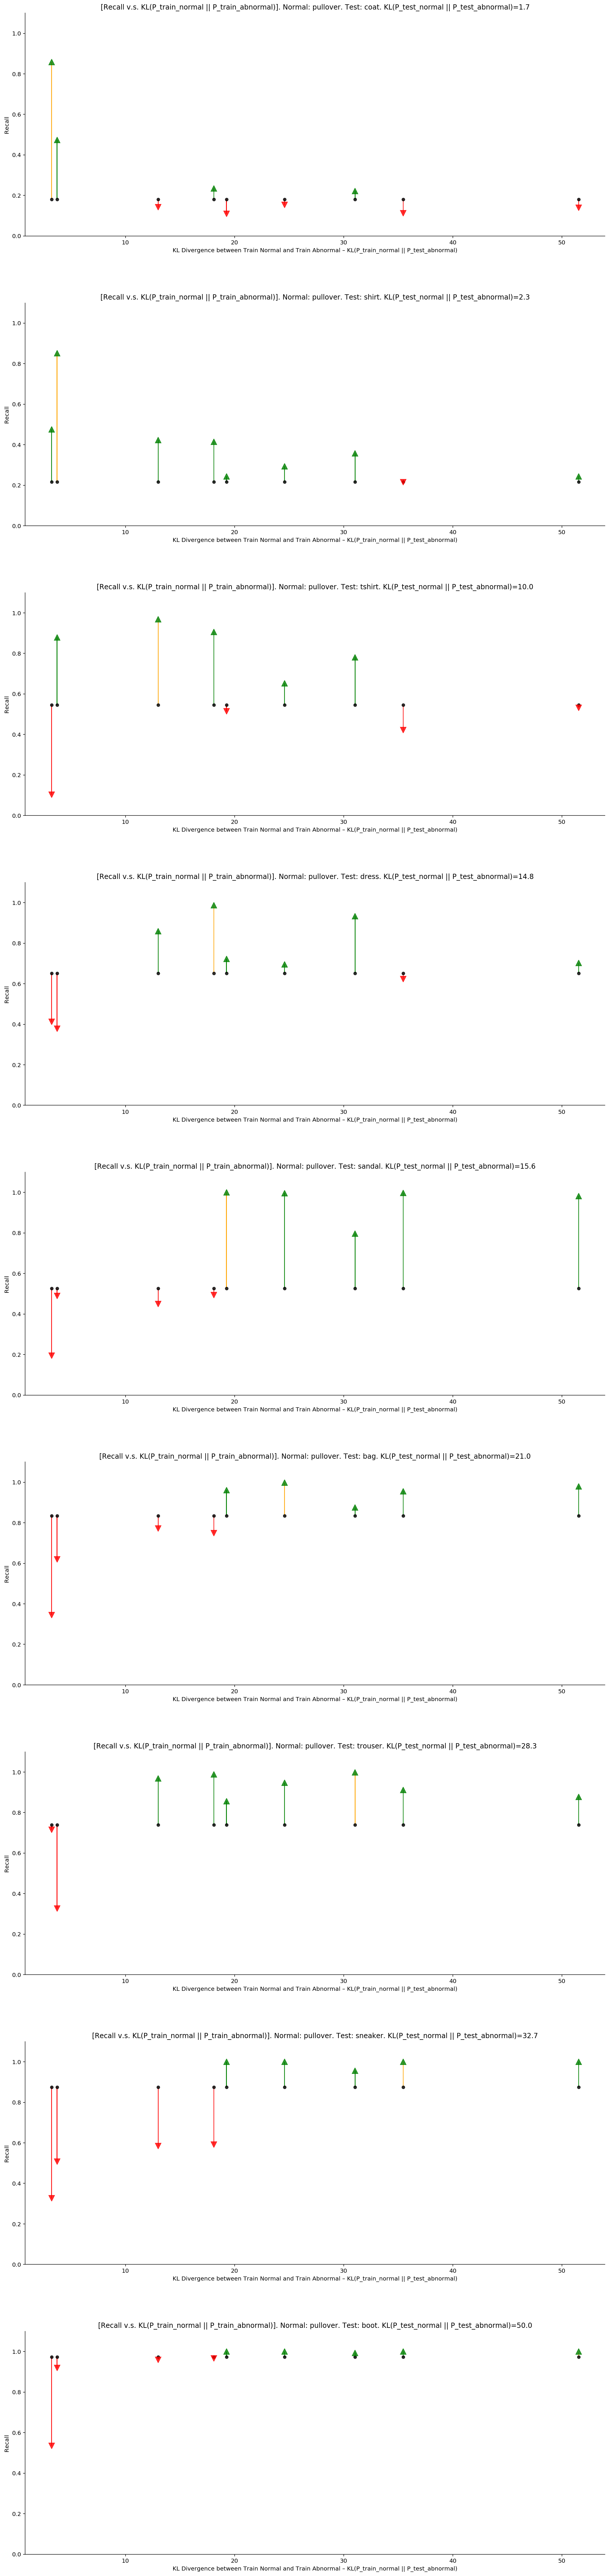

In [12]:
n = len(i_list)
fig, axes = plt.subplots(ncols=1, nrows=n, figsize=(18, 9 * n))
plt.subplots_adjust(hspace=0.3)

xlim_left = None
xlim_right = None

for ind, i in enumerate(i_list):
    y0 = np.array(y_un[i])
    y1 = np.array(y_semi[i])
    margin_x = np.array(x_margin[i])

    dy = y1 - y0
    pos_ind = np.where(dy >= 0)[0]
    nega_ind = np.where(dy < 0)[0]

    axes[ind].plot(margin_x[pos_ind], y0[pos_ind], '.', color='black', markersize=10, alpha=0.8)
    axes[ind].plot(margin_x[nega_ind], y0[nega_ind], '.', color='black', markersize=10, alpha=0.8)
    axes[ind].plot(margin_x[pos_ind], y1[pos_ind], '^', color='green', markersize=10, alpha=0.8)
    axes[ind].plot(margin_x[nega_ind], y1[nega_ind], 'v', color='red', markersize=10, alpha=0.8)
    
    for j in range(len(y0)):
        if j == ind_list_.index(i):
            axes[ind].arrow(margin_x[j], y0[j], 0, y1[j] - y0[j],
                  width=0.001, length_includes_head=True, head_length=0.01, color='orange')  
        elif y0[j] - y1[j] >= 0:
            axes[ind].arrow(margin_x[j], y0[j], 0, y1[j] - y0[j],
                  width=0.001, length_includes_head=True, head_length=0.01, color='red')
        else:
            axes[ind].arrow(margin_x[j], y0[j], 0, y1[j]-y0[j],
                  width=0.001, length_includes_head=True, head_length=0.01, color='green')

    axes[ind].set_ylim(0, 1.1)
    axes[ind].set_xlim(xlim_left, xlim_right)

    sns.despine()
    axes[ind].set_ylabel('Recall')
    axes[ind].set_xlabel('KL Divergence between Train Normal and Train Abnormal – KL(P_train_normal || P_test_abnormal)')
    axes[ind].set_title('[Recall v.s. KL(P_train_normal || P_train_abnormal)]. Normal: {}. Test: {}. KL(P_test_normal || P_test_abnormal)={}'.format(identifier_name, name_list[i], round(margin_test_for_identifier[i], 1)))